# Project Title - BigBasket Analysis

**By**: Kunal Yogesh Dhamal

# Problem Statement

**Understanding customer purchasing patterns and product performance is crucial for optimizing inventory, enhancing customer satisfaction, and maximizing revenue. However, the absence of detailed analysis can lead to inefficiencies in stock management, suboptimal marketing strategies, and missed opportunities for revenue growth. This project aims to address these challenges by analyzing transactional and product-related data to derive actionable insights.**

# Objective:

**• To analyze sales data to identify trends and patterns in customer purchases and product performance.**
 
**• To assess the effectiveness of discounts and their impact on total revenue.**
 
**• To evaluate product ratings and payment preferences to enhance customer satisfaction and experience.**
 
**• To provide actionable insights through visualizations for informed decision-making in inventory, pricing, and marketing strategies.**

# Github Link

### https://github.com/kunal5004/Python_Sprint2

# *Importing necessary packages*

In [1]:
import mysql.connector # Establishing a connection to the MySQL database using the MySQL Connector library
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import squarify # visualizing hierarchical data with rectangles proportional to their values.


**Insight**

*Imported all necessary packages.*

In [2]:
import mysql.connector

try:
    # Establish the connection to the database
    db_connection = mysql.connector.connect(
        user='root',
        password='sql123',
        host='localhost',
        database='groceries'  # specify the database name here
    )

    # Check if the connection is successful
    if db_connection.is_connected():
        print("Connection to the database was successful!")

except mysql.connector.Error as err:
    # Handle any connection errors
    print(f"Error: {err}")


Connection to the database was successful!


**Insight**

*The code establishes a connection to a locally hosted MySQL database (finance) using the mysql.connector.connect method, allowing you to perform SQL operations in Python. Ensure to manage sensitive data securely and handle errors appropriately*

In [3]:
# SQL query to join Applicants and Loans tables
query = """
SELECT * 
FROM orders
JOIN customer ON orders.customer_id = customer.customer_id
JOIN product ON orders.product_id = product.product_id;
"""

**Insight**

*The query performs an INNER JOIN between the orders, customer, and product tables by explicitly specifying join conditions on customer_id and product_id. This retrieves all columns from the three tables where there are matching values in the specified columns, providing a detailed view of each order along with related customer and product information.*

In [4]:
# Load the data into a pandas DataFrame
df = pd.read_sql(query, db_connection)
df.head() # Display the first few rows of the data

# Close the connection
#db_connection.close()

C:\Users\Kunal\AppData\Local\Temp\ipykernel_17144\2376859912.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status,rating,customer_id,...,pin_code,product_id,product_name,brand,category,sub_category,market_price,sale_price,stock,type
0,1,CUST001,P023,4.0,884.71,Debit Card,2024-11-30 13:41:48,Pending,2.9,CUST001,...,400001,P023,Chia Seeds,NaturoBell,"Foodgrains, Oil & Masala",Dry Fruits,120.0,120.00,80,Other Dry Fruits
1,2,CUST025,P093,1.0,336.07,Debit Card,2024-11-30 13:41:48,Cancelled,4.7,CUST025,...,422003,P093,Topp Up Milk - Elaichi,Gowardhan,"Bakery, Cakes & Dairy",Dairy,90.0,80.01,100,"Flavoured, Soya Milk"
2,3,CUST012,P094,3.0,420.09,Cash on Delivery,2024-11-30 13:41:48,Cancelled,2.7,CUST012,...,411002,P094,Namkeen - Madras Mixture,Townbus,Snacks & Branded Foods,Snacks & Namkeen,10.0,10.00,200,Namkeen & Savoury Snacks
3,4,CUST030,P042,2.0,650.32,Cash on Delivery,2024-11-30 13:41:48,Delivered,3.7,CUST030,...,411004,P042,Lemon & Tea Tree Oil Soap,Liril,Beauty & Hygiene,Bath & Hand Wash,360.0,360.00,90,Bathing Bars & Soaps
4,5,CUST020,P085,1.0,326.61,Credit Card,2024-11-30 13:41:48,Shipped,1.8,CUST020,...,110003,P085,Exo Dishwash Bar- Round 700 gm Box + Pril Dish...,bb Combo,Cleaning & Household,Detergents & Dishwash,114.0,95.00,200,Dishwash Bars & Powders


**Insight**

*Here we print first 5 rows of the dataset.*

# Understanding variable

**order_id:** Unique identifier for each order.

**customer_id:** Unique identifier for customers associated with orders.

**product_id:** Unique identifier for products included in orders.

**quantity:** Number of units ordered for a specific product.

**total_price:** Total price of the ordered products (quantity × sale price).

**payment_mode:** Method of payment used for the order (e.g., Credit Card, COD).

**order_date:** Date and time when the order was placed.

**order_status:** Current status of the order (e.g., Delivered, Pending).

**rating:** Customer-provided rating for the order or product.

**pin_code:** Postal code of the customer’s delivery address.

**product_name:** Name of the product.

**brand:** Brand associated with the product.

**category:** Broad classification of the product (e.g., Electronics, Grocery).

**sub_category:** More specific classification within the product category.

**market_price:** Original price of the product before discounts.

**sale_price:** Discounted price at which the product is sold.

**stock:** Availability of the product (in units).

**type:** Type or specification of the product (e.g., Organic, Imported).

In [5]:
# Prints the shape i.e. the row size by column size of the dataset
df.shape

(60, 25)

**Insight**

*The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.*

In [6]:
# Gives the overall info of the dataframe object
df.describe()

,order_id,quantity,total_price,order_date,rating,pin_code,market_price,sale_price,stock
count,60.000000,60.000000,60.000000,60,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,2.333333,703.286333,2024-11-30 13:49:42.600000,3.233333,419302.483333,271.200000,239.841500,93.916667
min,1.000000,1.000000,201.020000,2024-11-30 13:41:48,1.200000,110001.000000,10.000000,10.000000,20.000000
25%,15.750000,1.000000,387.232500,2024-11-30 13:41:48,2.700000,400001.750000,90.000000,80.007500,60.000000
50%,30.500000,2.000000,542.455000,2024-11-30 13:41:48,3.250000,416503.000000,200.000000,180.000000,90.000000
75%,45.250000,3.000000,903.127500,2024-11-30 13:41:48,4.000000,560002.000000,360.000000,339.150000,120.000000
max,60.000000,5.000000,2097.260000,2024-11-30 14:15:42,4.900000,700003.000000,1098.000000,1098.000000,200.000000
std,17.464249,1.271149,438.447206,NaN,0.991774,161295.355395,247.376937,229.130143,46.633185


**Insight**

*It provides statistics like count, mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max) for each numerical column.*

In [7]:
# for understanding stastical summary we will take Quantity

# 1. The count is 60.

# 2. The mean rating is 2.33 .

# 3. The standard deviation rating of the rating is 1.27.

# 4. The min ratings is 1.

# 5. The 25th percentile of the ratings is 1.00.

# 6. The 50th percentile of the ratings is 2.00.

# 7. The 75th percentile of the ratings is 3.00.

# 8. The maximum rating is 5.00.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      60 non-null     int64         
 1   customer_id   60 non-null     object        
 2   product_id    60 non-null     object        
 3   quantity      60 non-null     float64       
 4   total_price   60 non-null     float64       
 5   payment_mode  60 non-null     object        
 6   order_date    60 non-null     datetime64[ns]
 7   order_status  60 non-null     object        
 8   rating        60 non-null     float64       
 9   customer_id   60 non-null     object        
 10  name          60 non-null     object        
 11  city          60 non-null     object        
 12  email         60 non-null     object        
 13  phone_no      60 non-null     object        
 14  address       60 non-null     object        
 15  pin_code      60 non-null     int64       

**Insight**

*It displays the number of non-null entries, data types of each column, memory usage, and the total number of columns and rows. This is useful for understanding the structure of the DataFrame, identifying missing values, and verifying data types before processing or analysis.*

# Handle missing values(Data Cleaning)

In [9]:
df.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
rating          0
customer_id     0
name            0
city            0
email           0
phone_no        0
address         0
pin_code        0
product_id      0
product_name    0
brand           0
category        0
sub_category    0
market_price    0
sale_price      0
stock           0
type            0
dtype: int64

**Insight**

*It helps in identifying which columns have missing data and how many null values exist in each column. This is crucial for handling data cleaning tasks like imputing or removing missing values.*

# Duplicate Value

In [10]:
print(f"Duplicate entries before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate entries after dropping: {df.duplicated().sum()}")

Duplicate entries before dropping: 0
Duplicate entries after dropping: 0


**Insight**

*This code helps to ensure the DataFrame df is free of duplicate rows, making the dataset cleaner and more accurate for analysis.*

In [11]:
df.shape

(60, 25)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      60 non-null     int64         
 1   customer_id   60 non-null     object        
 2   product_id    60 non-null     object        
 3   quantity      60 non-null     float64       
 4   total_price   60 non-null     float64       
 5   payment_mode  60 non-null     object        
 6   order_date    60 non-null     datetime64[ns]
 7   order_status  60 non-null     object        
 8   rating        60 non-null     float64       
 9   customer_id   60 non-null     object        
 10  name          60 non-null     object        
 11  city          60 non-null     object        
 12  email         60 non-null     object        
 13  phone_no      60 non-null     object        
 14  address       60 non-null     object        
 15  pin_code      60 non-null     int64       

In [13]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'quantity', 'total_price',
       'payment_mode', 'order_date', 'order_status', 'rating', 'customer_id',
       'name', 'city', 'email', 'phone_no', 'address', 'pin_code',
       'product_id', 'product_name', 'brand', 'category', 'sub_category',
       'market_price', 'sale_price', 'stock', 'type'],
      dtype='object')

**Insight**

*Display All the columns from the dataset.*

# Data Visualization

# CHART1

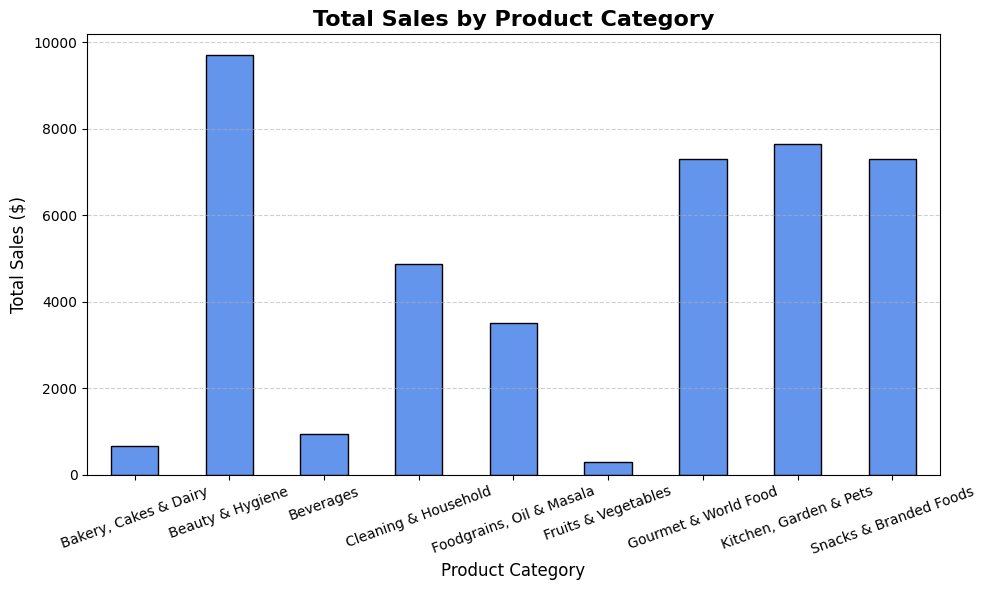

In [14]:

# Aggregating total sales by category
sales_by_category = df.groupby('category')['total_price'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='cornflowerblue', edgecolor='black')

# Adding titles and labels
plt.title('Total Sales by Product Category', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xlabel('Product Category', fontsize=12)

# Rotate the x-tick labels for readability
plt.xticks(rotation=20, fontsize=10)

# Adding gridlines for better clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


**Insight**

*-Displays sales for all the product Categories Available.*

*-"Beauty & Hygiene" ranks toppest followed by "Kitchen, Garden & pets", Gourmet & World Food and Snacks and Branded foods.*

# CHART2

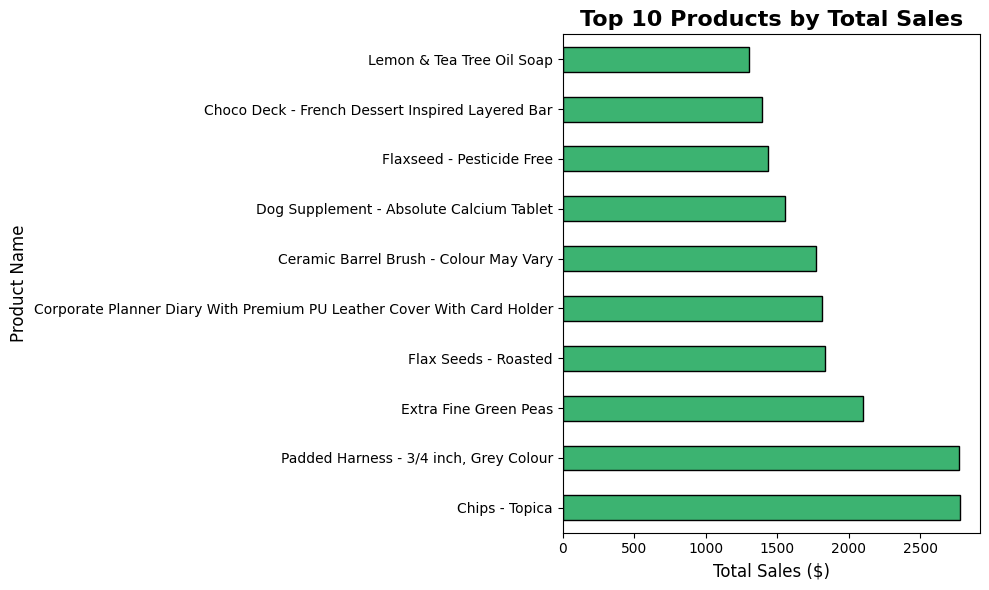

In [15]:
#Bar Chart Top 10 Products by Total Sales
# Aggregating total sales by product
sales_by_product = df.groupby('product_name')['total_price'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sales_by_product.plot(kind='barh', color='mediumseagreen', edgecolor='black')

# Adding titles and labels
plt.title('Top 10 Products by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Adjusting the layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Insight**

*Horizontal bar graph helps us visualize the top selling products and make labelling of Longer names easier to read.*

*Chips are highest selling product followed by Padded Harness and Green peas*

# CHART3

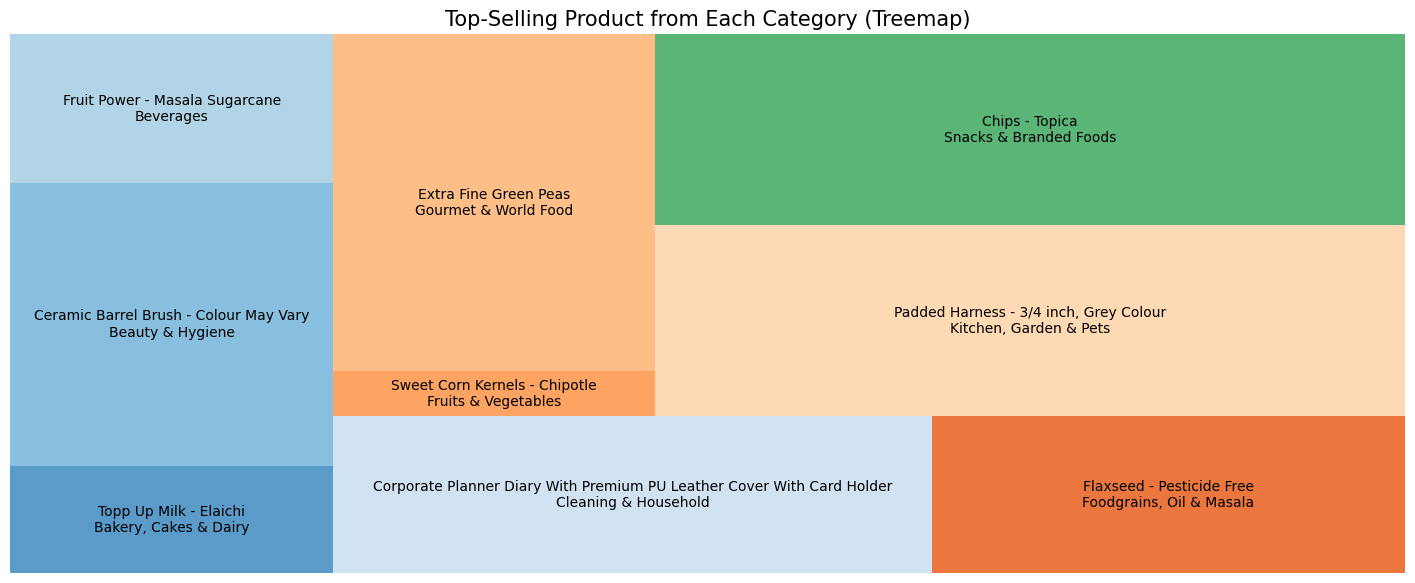

In [16]:

# Calculate total sales for each product in each category
category_product_sales = df.groupby(['category', 'product_name'])['total_price'].sum().reset_index()

# Get the top-selling product for each category
top_selling_products = category_product_sales.loc[category_product_sales.groupby('category')['total_price'].idxmax()]

# Create a Treemap
plt.figure(figsize=(18, 7))
squarify.plot(sizes=top_selling_products['total_price'], 
              label=top_selling_products['product_name'] + "\n" + top_selling_products['category'],
              alpha=0.8, color=plt.cm.tab20c.colors)

# Add title
plt.title('Top-Selling Product from Each Category (Treemap)', fontsize=15)

# Remove axes
plt.axis('off')

# Show the plot
plt.show()


**Insight**

*Tree map helps us visualize the best selling product across each category.*



# CHART4

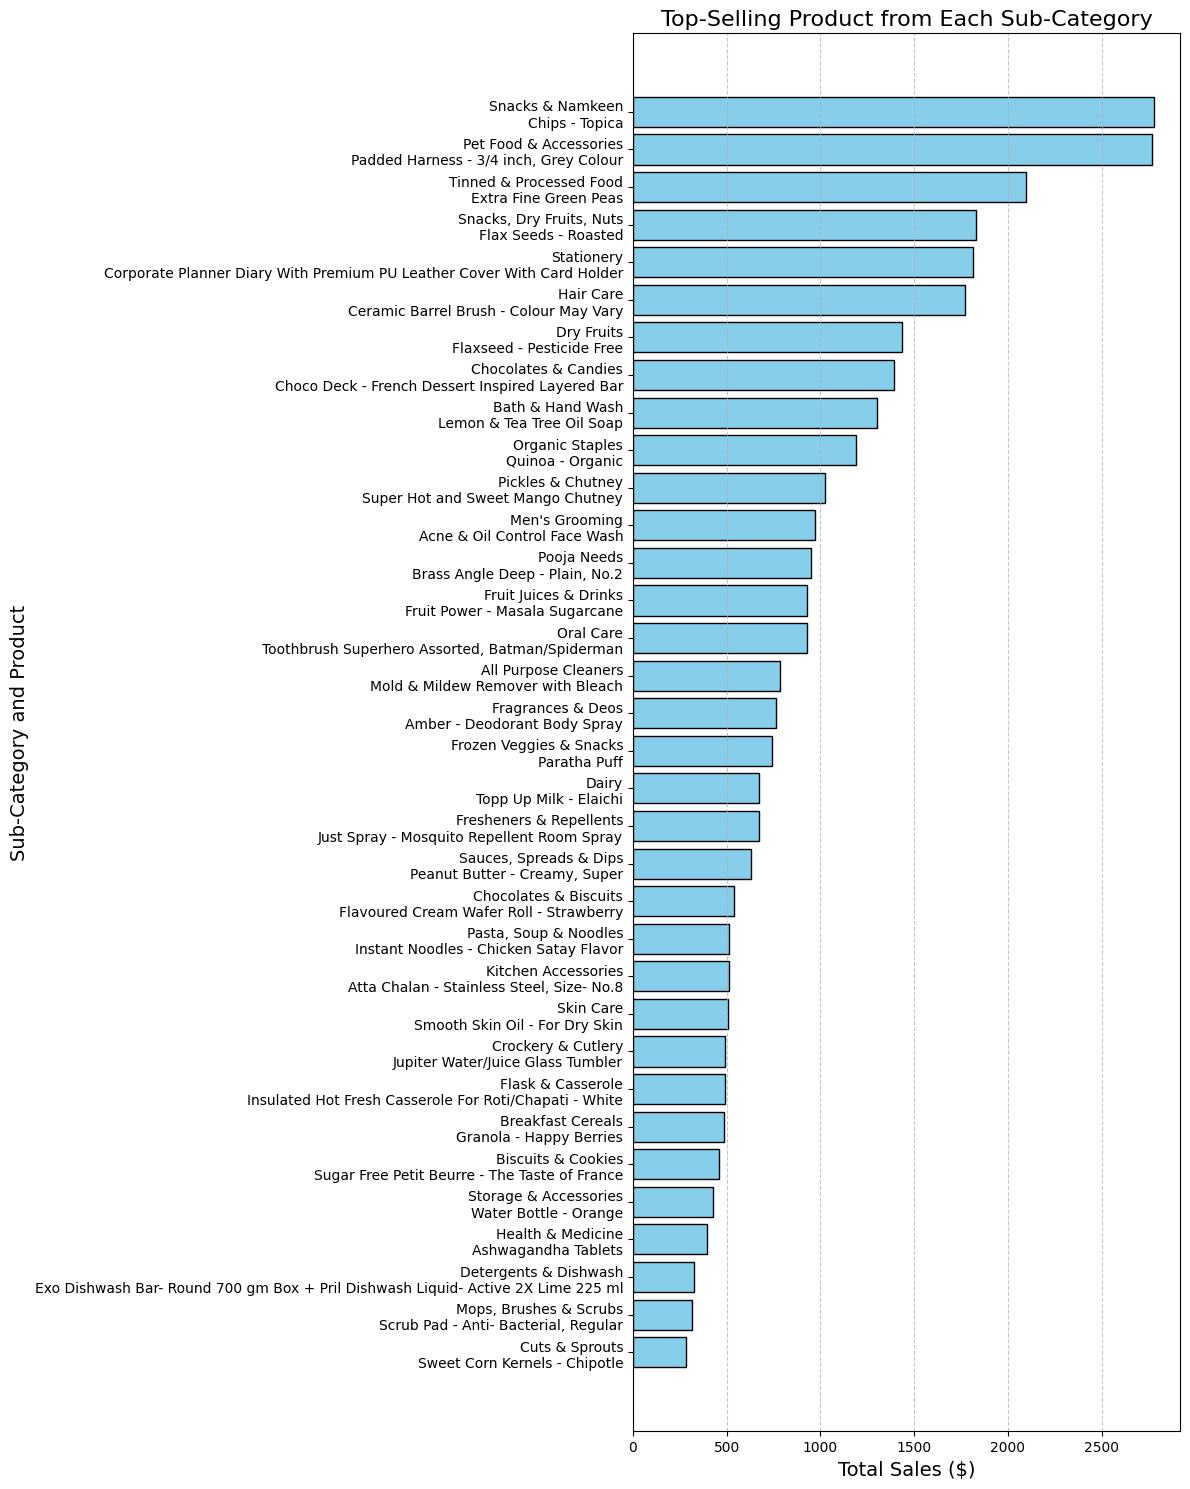

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total sales for each product in each sub-category
sub_category_product_sales = df.groupby(['sub_category', 'product_name'])['total_price'].sum().reset_index()

# Get the top-selling product for each sub-category
top_selling_products = sub_category_product_sales.loc[sub_category_product_sales.groupby('sub_category')['total_price'].idxmax()]

# Sort the data for better visualization
top_selling_products = top_selling_products.sort_values(by='total_price', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 15))
plt.barh(top_selling_products['sub_category'] + "\n" + top_selling_products['product_name'], 
         top_selling_products['total_price'], 
         color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Top-Selling Product from Each Sub-Category', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Sub-Category and Product', fontsize=14)

# Make the y-ticks readable
plt.yticks(fontsize=10, rotation=0)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**Insight**

*Horizontal bar chart helps us visualize top selling product across each Sub-category.*

*customers prefer to order Snacking items and Pet friendly products online more.*

# CHART5

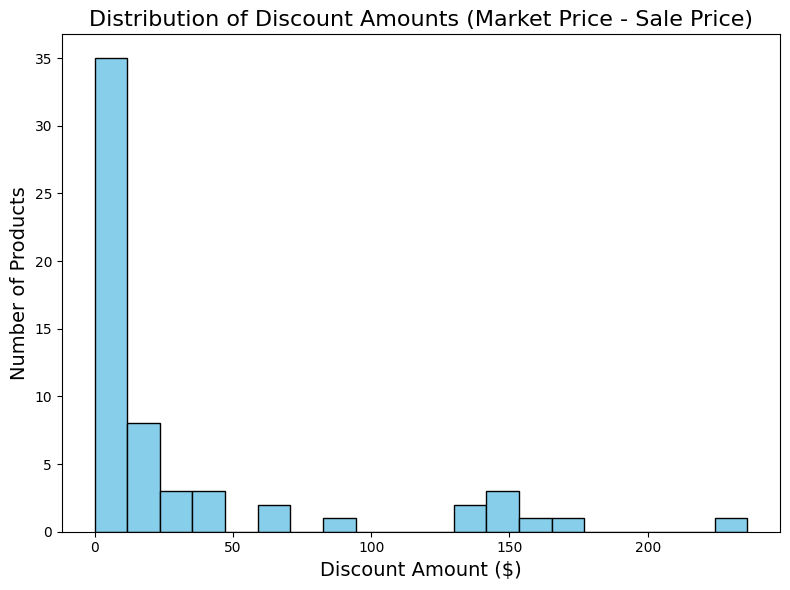

In [18]:
#Histogram (for distribution of discount amounts)

# Calculate the discount amount
df['discount_amount'] = df['market_price'] - df['sale_price']

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['discount_amount'], bins=20, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Discount Amounts (Market Price - Sale Price)', fontsize=16)
plt.xlabel('Discount Amount ($)', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


**Insight**

*This Histogram helps us understand Products availabel in different discount amount range.*

*There are approx 35 products wihtout any discount and a few under 10 with below 50$off*

*Some even have upto 150$ off.*

# CHART6

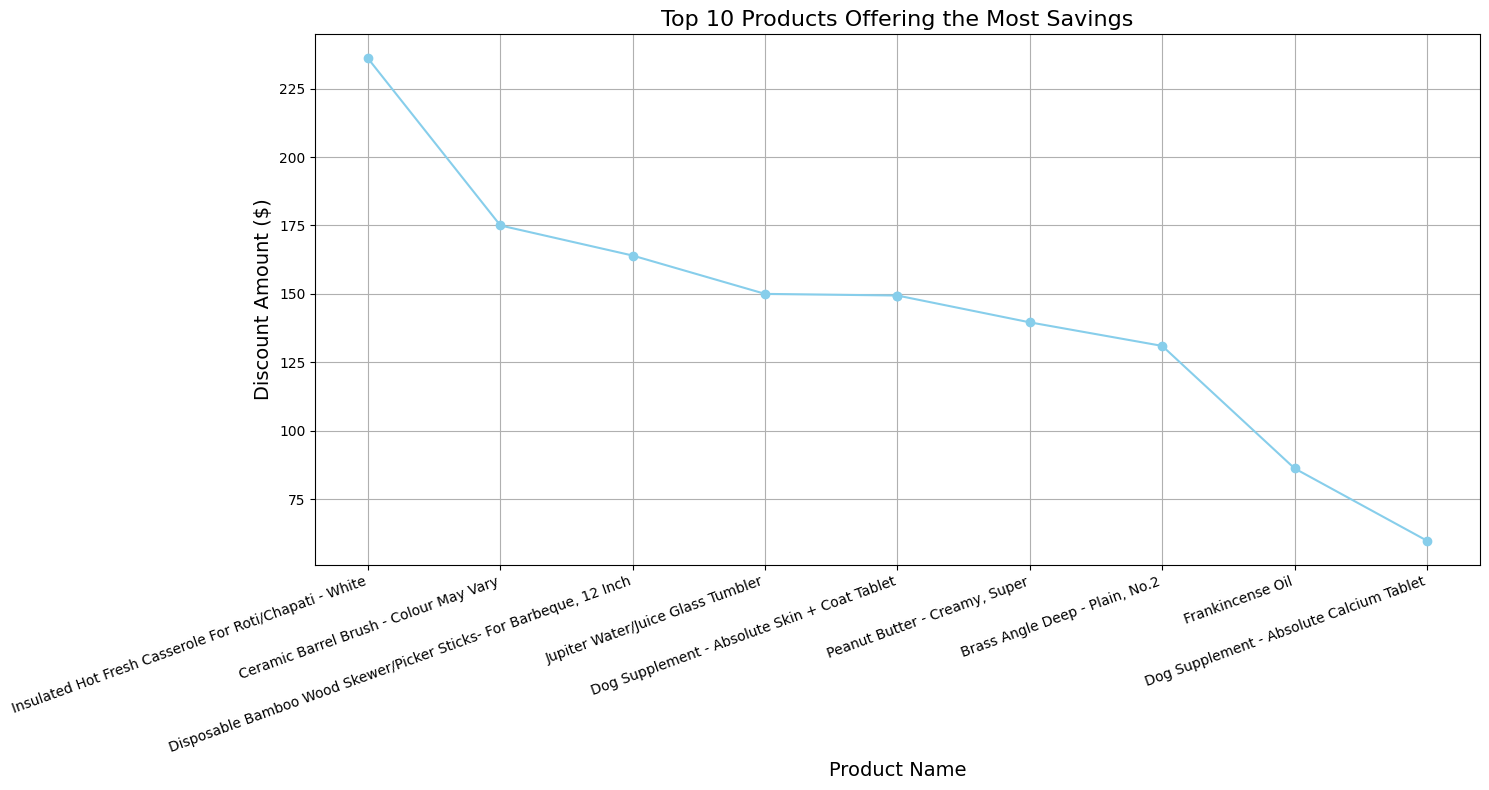

In [19]:
#Line Chart (for showing which products offer the most savings)
# Calculate the discount amount
df['discount_amount'] = df['market_price'] - df['sale_price']

# Sort the DataFrame by discount_amount in descending order to highlight the most savings
df_sorted = df.sort_values(by='discount_amount', ascending=False)

# Plotting the line chart (showing top 10 products with the most discount)
plt.figure(figsize=(15,8))
plt.plot(df_sorted['product_name'][:10], df_sorted['discount_amount'][:10], marker='o', color='skyblue', linestyle='-', markersize=6)

# Adding titles and labels
plt.title('Top 10 Products Offering the Most Savings', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Discount Amount ($)', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=20, ha='right')
# Adding gridlines to the chart
plt.grid(True)
# Show the plot
plt.tight_layout()
plt.show()


**Insight**

*Line chart helps us visualize most savings offering products.*

# CHART7

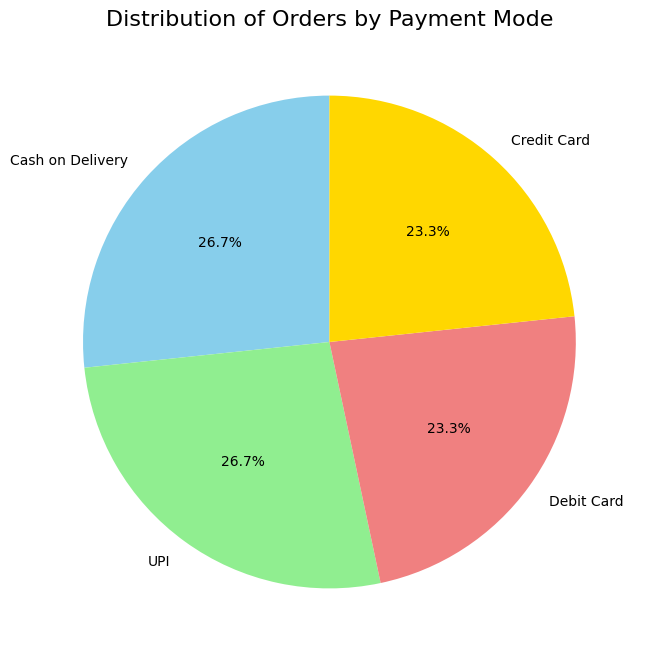

In [20]:
#Pie Chart: Distribution of Orders by Payment Mode

# Grouping by payment_mode to get the count of orders per payment mode
payment_mode_distribution = df['payment_mode'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
payment_mode_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'], startangle=90)

# Adding title
plt.title('Distribution of Orders by Payment Mode', fontsize=16)

# Show the plot
plt.ylabel('')  # Remove the y-label
plt.show()


**Insight**

*Pie chart helps us understand customers preference while making their payments at the checkout.*

*Upi and Cod with 26.7%, Debit card 23.3% and credit card 23.3%.*

# CHART8

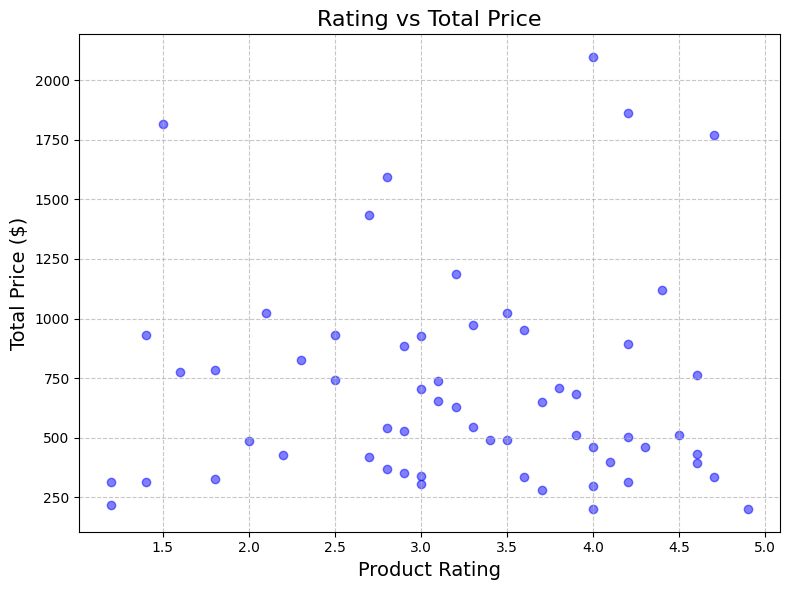

In [21]:
#Scatter Plot: Rating vs. Total Price

# Plotting a scatter plot to compare rating and total_price
plt.figure(figsize=(8, 6))
plt.scatter(df['rating'], df['total_price'], color='blue', alpha=0.5)

# Adding titles and labels
plt.title('Rating vs Total Price', fontsize=16)
plt.xlabel('Product Rating', fontsize=14)
plt.ylabel('Total Price ($)', fontsize=14)

# Show gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**Insights**

*Scatter plot shows the relationship between product ratings (x-axis) and total price ($) (y-axis).*

**Majority of Products:** *Most products fall within the mid-range rating (2.5–4.0) and lower price range (below $750).*

# CHART9

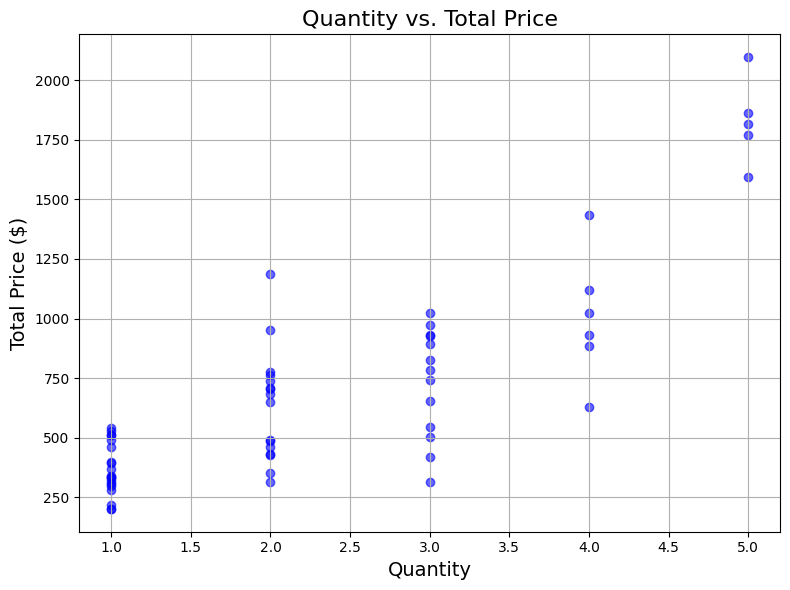

In [22]:
#This scatter plot will help you understand how the quantity of a product is related to the total_price for each order.

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['quantity'], df['total_price'], color='blue', alpha=0.6)

# Adding titles and labels
plt.title('Quantity vs. Total Price', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Total Price ($)', fontsize=14)

# Show gridlines for better visibility
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


**Insight**

*scatter plot shows the relationship between the quantity of products ordered (x-axis) and the total price ($) (y-axis).*

*Most orders with quantity = 1 or 2 fall in the lower price range (below $750).*

*Orders with higher quantities (4–5) result in significantly higher total prices (above $1250).*

Even for low quantities (1 or 2), some orders reach higher total prices (e.g., above $1000), likely due to high-priced items being purchased.*



# CHART10

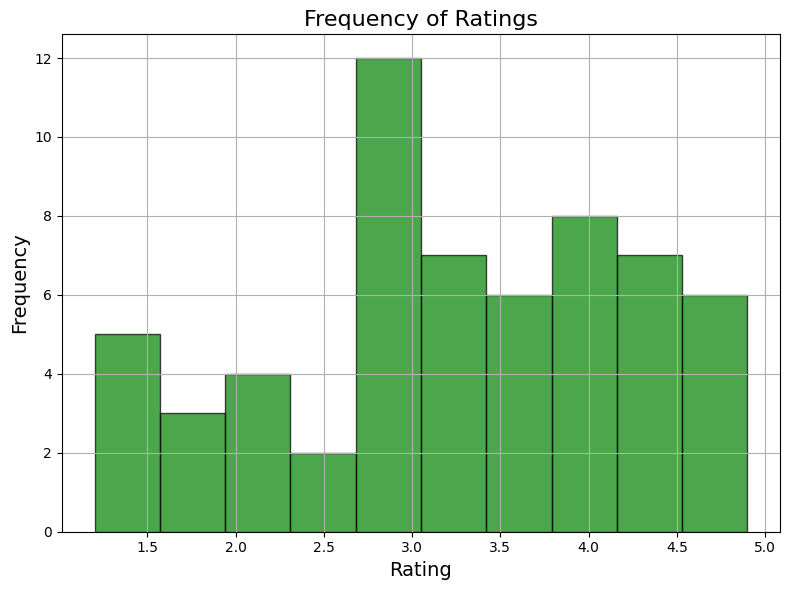

In [23]:
#Histogram: Frequency of Ratings

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=10, color='green', edgecolor='black', alpha=0.7)

# Adding titles and labels
plt.title('Frequency of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show gridlines for better visibility
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


**Insight**

*Histogram helps us understand frequency of ratings by users out of 5.*

*Most of the products are rated in the range between 3-4*

*Maybe the product is not to excellent in termns of quality or design but gets the work done.*

# CHART11

In [24]:
correlation_matrix = df[['quantity', 'total_price', 'discount_amount', 'rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()


NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

**Insight**

*This Correlation Heatmap of Numerical Variables visualizes the strength and direction of relationships between different numerical attributes in the dataset.*

**Quantity and Total Price (0.84):** *A strong correlation indicates that an increase in the quantity of products ordered leads to a proportional increase in the total price. This is expected since total price is influenced directly by quantity.*

**Discount Amount with Quantity or Total Price:** *Discount amounts are not strongly correlated with quantity (-0.03) or total price (-0.01). This suggests that discounts are not dependent on the number of items or their price.*

***Rating with Other Variables:** *Ratings show little to no correlation with total price (-0.00), quantity (-0.08), or discount amount (0.14), indicating that product quality (as perceived by ratings) does not necessarily influence these variables.*

*Both the discount amount and rating appear to act independently of other variables in the dataset, as their correlations with quantity, price, or each other are weak.*


# CHART12

In [ ]:
sales_by_payment = df.groupby('payment_mode')['total_price'].sum()

plt.figure(figsize=(8, 6))
sales_by_payment.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by Payment Mode', fontsize=16)
plt.xlabel('Payment Mode', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=0)
plt.show()


**Insight**

*Bar Graph helps us understand the transactions made by customers through available payment options.*

*UPI seems to be the most loved option by cutomers as it is very convenient and easy to use for anyone.*

# Conclusion

*-This project aims to provide a comprehensive understanding of customer preferences, purchasing patterns, and product performance within the grocery delivery market, offering valuable insights into the dynamics of online grocery shopping.*

*-This project presents a detailed analysis of Bigbasket’s sales data, exploring various trends, challenges, and opportunities that shape consumer behavior and payment preferences.*

*-It encompasses all aspects of product and category-level performance, shedding light on how strategic focus on top-selling products and categories can maximize revenue and customer satisfaction.*

*-This analysis highlights the impact of discounts and savings on consumer behavior, revealing that higher discounts often drive higher sales. By leveraging these insights, Bigbasket can refine its pricing strategies and promotional campaigns to increase customer loyalty.*

*-This analysis provides an overview of customer preferences for payment methods and their rating patterns, helping Bigbasket align its payment offerings with customer convenience and satisfaction.*

*-The findings emphasize the importance of monitoring sales performance by category and subcategory, leveraging customer ratings for product improvements, and optimizing discount strategies. By acting on these insights, Bigbasket can enhance its operations, improve customer satisfaction, and maintain a competitive edge in the online grocery market.*

# Recommendations

**Enhancing Product Offerings**

* Increase the stock of top-selling items in these categories by at least 20% to ensure availability and avoid stockouts.
* Introduce bundle deals or discounts on these items to incentivize purchases and increase the average cart value.

**Optimizing Discount Strategies**

* Increase the frequency of discounts in the $50–$100 range, targeting 15% more products. This strategy can appeal to cost-sensitive customers and boost sales for mid-range priced items.
* Advertise products with the highest savings through marketing campaigns (e.g., "Top Savings of the Week") to attract more customers.

**Improving Payment Experience**

* Partner with UPI providers to offer exclusive cashback or loyalty points on purchases. Target a 10% growth in UPI transactions by incentivizing this method.
* COD is also widely used, accounting for 26.7% of transactions, indicating trust issues with online payments for some users. Introduce easy returns/refunds for COD purchases to build trust and encourage customers to try other payment methods.
* Deploy a recommendation engine for this purpose, aiming for a 5% uplift in conversion rates.
* Launch personalized email campaigns offering discounts for repeat transactions using their preferred payment modes.

**Leveraging Ratings for Quality Control**

*Identify products with high sales but average ratings and improve their quality by 10% based on customer feedback (e.g., packaging, durability, or design).

**Targeting Customer Buying Behavior**

* Implement bulk-buy incentives such as "Buy 4, Get 1 Free" or flat 5% off on orders above $1000 to drive bulk orders.
* Use targeted ads and product recommendations to showcase premium items to high-spending customers, driving approx 20% more revenue from this segment.

**Optimize Delivery Routes by Pin Codes:**
* Increase delivery slots and ensure stock availability in top-performing pin codes to reduce delivery times and improve satisfaction.

**Improving Customer Experience**

*  Introduce a "No Questions Asked Returns" policy for items rated below 3 stars.
*  Resolve at least 80% of flagged product issues within a month through vendor collaboration.